

# **Inpainting to Restore Damaged Photos**

**In this lesson we'll take a damaged old photo, and restore it using the inpaint() function**

## **Great Blogs**
- https://pyimagesearch.com/2020/05/18/image-inpainting-with-opencv-and-python/
- https://codeburst.io/quick-guide-to-image-inpainting-using-opencv-248d3c2828bd
- https://towardsdatascience.com/image-inpainting-with-a-single-line-of-code-c0eef715dfe2


In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2023-06-06 13:21:39--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.142.46
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.142.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  6.99MB/s    in 4.0s    

2023-06-06 13:21:44 (6.99 MB/s) - ‘images.zip’ saved [29586716/29586716]



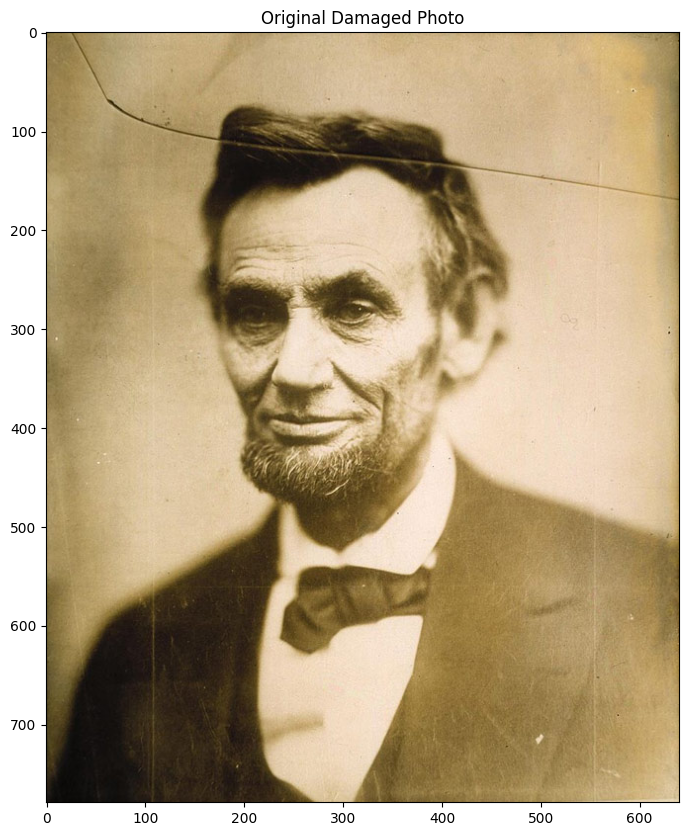

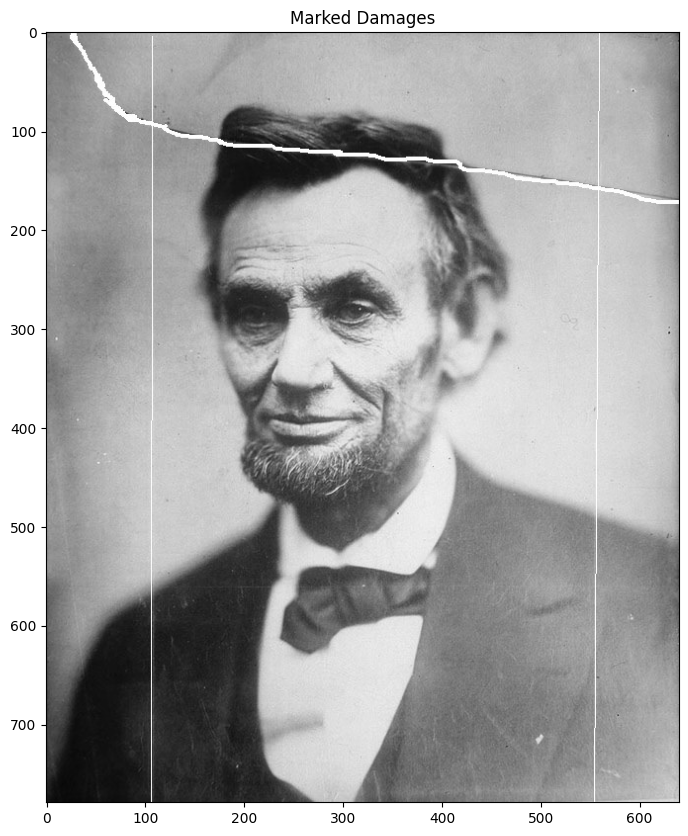

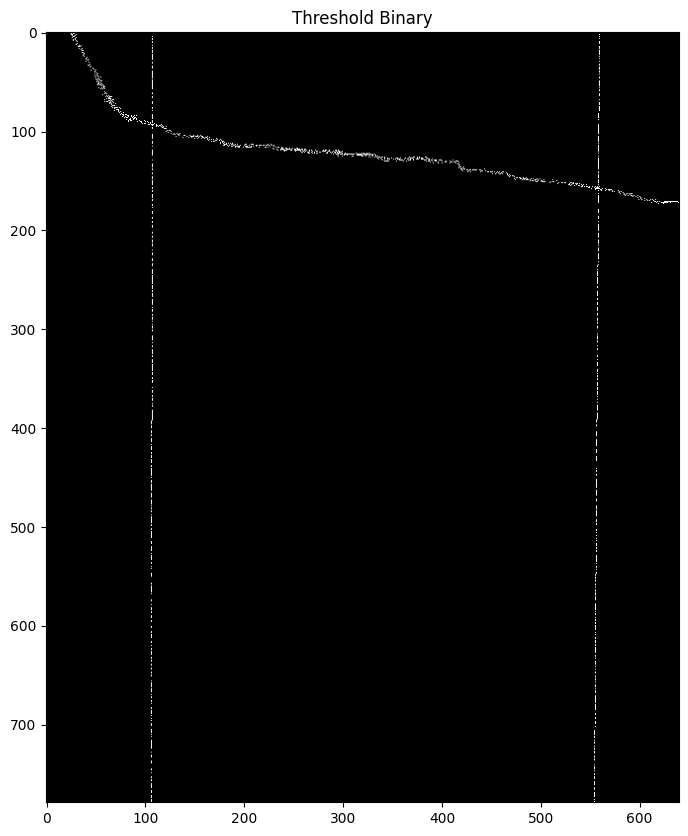

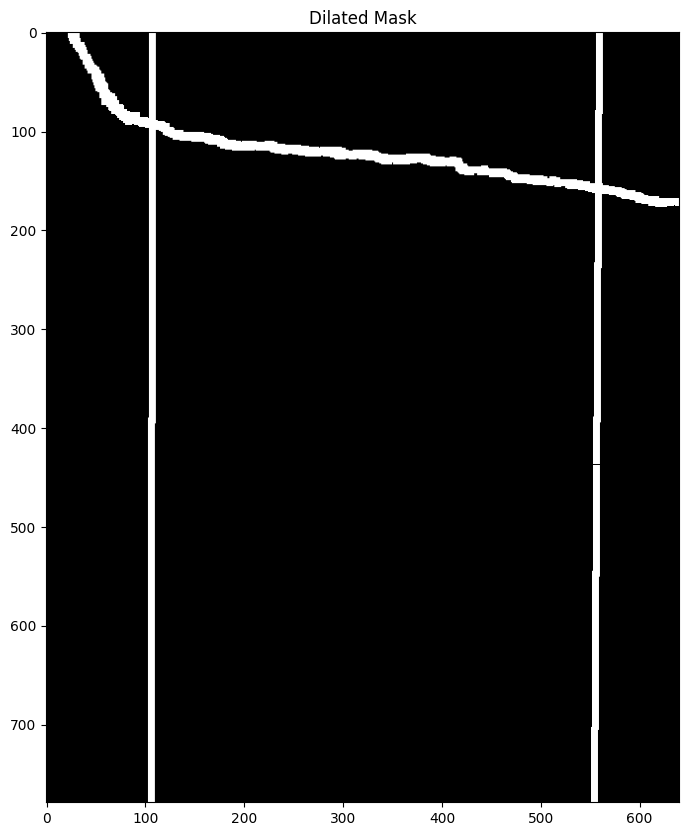

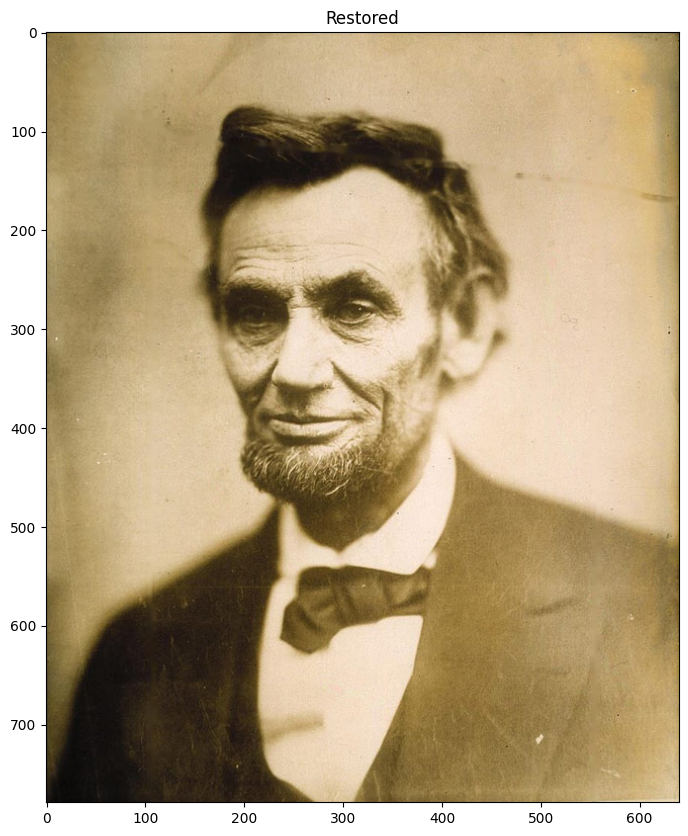

In [2]:
# Load our damaged photo
image = cv2.imread('images/abraham.jpg')
imshow('Original Damaged Photo', image)

# Load the photo where we've marked the damaged areas
marked_damages = cv2.imread('images/mask.jpg', 0)
imshow('Marked Damages', marked_damages)

# Let's make a mask out of our marked image be changing all colors 
# that are not white, to black
ret, thresh1 = cv2.threshold(marked_damages, 254, 255, cv2.THRESH_BINARY)
imshow('Threshold Binary', thresh1)


# Let's dilate (make thicker) our the marks w made
# since thresholding has narrowed it slightly
kernel = np.ones((7,7), np.uint8)
mask = cv2.dilate(thresh1, kernel, iterations = 1)
imshow('Dilated Mask', mask)
cv2.imwrite("images/abraham_mask.png", mask)

restored = cv2.inpaint(image, mask, 3, cv2.INPAINT_TELEA)

imshow('Restored', restored)